# Directions for running:

For the purposes of this demonstration, let's assume your AEP User ID is s123456, and your local Documents directory
is located at C:\Users\s123456\Documents

1. If not already done, clone the Analysis GitHub repo (https://github.aepsc.com/s346557/Analysis).
<br>- I will assume the repo was cloned into the Documents directory, i.e. I assume your local copy of the repo is located at C:\Users\s123456\Documents\Analysis (and therefore, this Jupyter notebook should be located at C:\Users\s123456\Documents\Analysis\JupyterNbs\IT_Demo.ipynb)
<br><br>

2. Create a simple text file containing your AEP passwords.
- I suggest you use the file pwd_file_template.txt in the Analysis directory (C:\Users\s123456\Documents\Analysis\pwd_file_template.txt) to create your own password file.
    - DO NOT ALTER the pwd_file_template.txt file, create a new pwd_file.txt file!
- I further suggest you name your password file pwd_file.txt and place it in the Analysis directory (C:\Users\s123456\Documents\Analysis\pwd_file.txt).
    - The Git repo is set up to ignore pwd_file.txt in the Analysis directory, so your information will not be pushed up to the repo if saved in this manner.
- NOTE: At one point, my Athena and Oracle passwords were different, which is why there is a 'Main' and 'Oracle' entry in the password file.  Likely you will put the same password for both entries.
<br><br>

3. IF NOT ALREADY DONE, run the method Utilities_config.generate_initial_config_file to initiate your config.yaml file
- I suggest you input arguments for all three parameters (aep_user_id, pwd_file_path, and local_data_dir)
    - If no aep_user_id is given, the code will attempt to determine your AEP User ID from the contents of your C:\Users directory
    - If no pwd_file_path is given, it is assumed to exist, be named pwd_file.txt, and be located in the Analysis directory (C:\Users\s123456\Documents\Analysis\pwd_file.txt)
    - If local_data_dir is not None, it should point to a directory when you plan to store any results (my personal local_data_dir is located at C:\Users\s346557\Documents\LocalData\).
        - If you are not planning to save or load any files locally, I believe this can be kept as None

# ----------------------------------------------------------------------------------------------------
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ONLY NEED TO RUN ONCE!
So, if you have already run Utilities_config.generate_initial_config_file (and your configuration has not changed since), there is no need to run again

In [3]:
run_config=False

# REPLACE VALUES BELOW WITH YOUR OWN!!!!!!!!!!!!!!!!!!!!!!!!!
aep_user_id = 's123456'
pwd_file_path = r'C:\Users\s3123456\Documents\Analysis\pwd_file.txt'
local_data_dir = r'C:\Users\s123456\Documents\LocalData'
#-----
# Names below should equal those you chose for the databases in AQT.
# If you don't have permissions for one, simply leave the default value.
# At the time of writing (Feb. 2024), to use the software, one typically needs connections to Athena Prod, 
#   UTLDB01P, and possibly EEMSP
athena_prod_dsn = 'Athena Prod'
athena_dev_dsn  = 'Athena Dev'
athena_qa_dsn   = 'Athena QA'
utldb01p_dsn    = 'UTLDB01P'
eemsp_dsn       = 'EEMSP'

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
if run_config:
    Utilities_config.generate_initial_config_file(
        aep_user_id                  = aep_user_id, 
        pwd_file_path                = pwd_file_path, 
        local_data_dir               = local_data_dir, 
        create_local_data_dir_if_dne = True, 
        athena_prod_dsn              = athena_prod_dsn, 
        athena_dev_dsn               = athena_dev_dsn, 
        athena_qa_dsn                = athena_qa_dsn, 
        utldb01p_dsn                 = utldb01p_dsn, 
        eemsp_dsn                    = eemsp_dsn, 
    )

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# ----------------------------------------------------------------------------------------------------

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [2]:
from importlib import reload

import sys, os
import re
from pathlib import Path
import pickle

import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype, is_timedelta64_dtype
from scipy import stats
import datetime
import time
from natsort import natsorted, ns, natsort_keygen
from packaging import version

import copy
import itertools
import adjustText

import pyodbc
#---------------------------------------------------------------------
sys.path.insert(0, os.path.realpath('..'))
import Utilities_config
#-----
import CommonLearningMethods as clm
#-----
from MeterPremise import MeterPremise
from EEMSP import EEMSP
#-----
from AMI_SQL import AMI_SQL
from AMINonVee_SQL import AMINonVee_SQL
from AMIEndEvents_SQL import AMIEndEvents_SQL
from AMIUsgInst_SQL import AMIUsgInst_SQL
from DOVSOutages_SQL import DOVSOutages_SQL
#-----
from GenAn import GenAn
from AMINonVee import AMINonVee
from AMIEndEvents import AMIEndEvents
from AMIEDE_DEV import AMIEDE_DEV
from MECPODf import MECPODf
from MECPOAn import MECPOAn
from AMIUsgInst import AMIUsgInst
from DOVSOutages import DOVSOutages
from DOVSAudit import DOVSAudit
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_sql_aids_dir())
import Utilities_sql
import TableInfos
from TableInfos import TableInfo
from SQLElement import SQLElement
from SQLElementsCollection import SQLElementsCollection
from SQLSelect import SQLSelectElement, SQLSelect
from SQLFrom import SQLFrom
from SQLWhere import SQLWhereElement, SQLWhere
from SQLJoin import SQLJoin, SQLJoinCollection
from SQLGroupBy import SQLGroupByElement, SQLGroupBy
from SQLHaving import SQLHaving
from SQLOrderBy import SQLOrderByElement, SQLOrderBy
from SQLQuery import SQLQuery
from SQLQueryGeneric import SQLQueryGeneric
#---------------------------------------------------------------------
sys.path.insert(0, Utilities_config.get_utilities_dir())
import Utilities
import Utilities_df
from Utilities_df import DFConstructType
import Utilities_dt
import Plot_General
import DataFrameSubsetSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSlicer as DFSlicer
from DataFrameSubsetSlicer import DataFrameSubsetSingleSlicer as DFSingleSlicer
#---------------------------------------------------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from matplotlib import dates
import matplotlib.colors as mcolors
import matplotlib.cm as cm #e.g. for cmap=cm.jet

# ----------------------------------------------------------------------------------------------------
# GENERAL STUFF
# ----------------------------------------------------------------------------------------------------

### MeterPremise class

In [5]:
mp = MeterPremise(
    init_df_in_constructor    = False, 
    build_sql_function        = MeterPremise.build_sql_meter_premise, 
    build_sql_function_kwargs = dict(
        curr_cust_nm = 'HENNESSEY KEVIN', 
        state        = 'oh'
    ), 
)

In [6]:
print(mp.get_sql_statement())

SELECT
	MP.mfr_devc_ser_nbr,
	MP.longitude,
	MP.latitude,
	MP.state_cd,
	MP.prem_nb,
	MP.srvc_pole_nb,
	MP.trsf_pole_nb,
	MP.latitude_nb,
	MP.longitude_nb,
	MP.circuit_nb,
	MP.circuit_nm,
	MP.station_nb,
	MP.station_nm,
	MP.xfmr_nb,
	MP.annual_kwh,
	MP.annual_max_dmnd,
	MP.mtr_stat_cd,
	MP.mtr_stat_cd_desc,
	MP.devc_stat_cd,
	MP.devc_stat_cd_desc
FROM default.meter_premise MP
WHERE MP.state_cd = 'oh'
AND   MP.curr_cust_nm = 'HENNESSEY KEVIN'


In [7]:
mp = MeterPremise(
    init_df_in_constructor    = True, 
    build_sql_function        = MeterPremise.build_sql_meter_premise, 
    build_sql_function_kwargs = dict(
        curr_cust_nm = 'HENNESSEY KEVIN', 
        state        = 'OH'
    ), 
)

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [8]:
mp.df

,mfr_devc_ser_nbr,longitude,latitude,state_cd,prem_nb,srvc_pole_nb,trsf_pole_nb,latitude_nb,longitude_nb,circuit_nb,circuit_nm,station_nb,station_nm,xfmr_nb,annual_kwh,annual_max_dmnd,mtr_stat_cd,mtr_stat_cd_desc,devc_stat_cd,devc_stat_cd_desc
0,881600840,-83.00920000,39.987980000,OH,105812916,1857398724487,1857398724487,39.987980000,-83.00920000,05,F-7705,0077,OSU,4,2846.000,0.000,C,CONNECTED,A,ACTIVE


### AMINonVee

In [9]:
ami = AMINonVee(
    init_df_in_constructor    = True, 
    build_sql_function        = AMINonVee_SQL.build_sql_usg, 
    build_sql_function_kwargs = dict(
        premise_nbs = mp.df['prem_nb'].unique().tolist(), 
        date_range  = ['2024-01-01', '2024-01-07']
    ), 
)

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [10]:
ami.df

,serialnumber,aep_premise_nb,starttimeperiod,endtimeperiod,aep_endtime_utc,timezoneoffset,aep_derived_uom,aep_srvc_qlty_idntfr,value,aep_opco,aep_usage_dt
0,881600840,105812916,2024-01-02T11:30:00-05:00,2024-01-02T11:45:00-05:00,1704213900,-05:00,KWH,TOTAL,0.086000,oh,2024-01-02
1,881600840,105812916,2024-01-02T21:15:00-05:00,2024-01-02T21:30:00-05:00,1704249000,-05:00,VOLT,AVG,247.300003,oh,2024-01-02
2,881600840,105812916,2024-01-02T02:45:00-05:00,2024-01-02T03:00:00-05:00,1704182400,-05:00,KWH,TOTAL,0.034000,oh,2024-01-02
3,881600840,105812916,2024-01-02T22:45:00-05:00,2024-01-02T23:00:00-05:00,1704254400,-05:00,KWH,TOTAL,0.128000,oh,2024-01-02
4,881600840,105812916,2024-01-02T13:45:00-05:00,2024-01-02T14:00:00-05:00,1704222000,-05:00,KWH,RECEIVED,0.000000,oh,2024-01-02
...,...,...,...,...,...,...,...,...,...,...,...
2683,881600840,105812916,2024-01-07T04:45:00-05:00,2024-01-07T05:00:00-05:00,1704621600,-05:00,VOLT,AVG,246.500000,oh,2024-01-07
2684,881600840,105812916,2024-01-07T08:00:00-05:00,2024-01-07T08:15:00-05:00,1704633300,-05:00,VOLT,AVG,245.199997,oh,2024-01-07
2685,881600840,105812916,2024-01-07T11:00:00-05:00,2024-01-07T11:15:00-05:00,1704644100,-05:00,KWH,TOTAL,0.596000,oh,2024-01-07
2686,881600840,105812916,2024-01-07T15:30:00-05:00,2024-01-07T15:45:00-05:00,1704660300,-05:00,KWH,RECEIVED,0.000000,oh,2024-01-07


In [11]:
print(ami.get_sql_statement())

SELECT
	serialnumber,
	aep_premise_nb,
	starttimeperiod,
	endtimeperiod,
	aep_endtime_utc,
	timezoneoffset,
	aep_derived_uom,
	aep_srvc_qlty_idntfr,
	value,
	aep_opco,
	aep_usage_dt
FROM usage_nonvee.reading_ivl_nonvee
WHERE aep_usage_dt BETWEEN '2024-01-01' AND '2024-01-07'
AND   aep_premise_nb = '105812916'


### AMIEndEvents

In [12]:
ami_ede = AMIEndEvents(
    init_df_in_constructor    = True, 
    build_sql_function        = AMIEndEvents_SQL.build_sql_end_events, 
    build_sql_function_kwargs = dict(
        premise_nbs = mp.df['prem_nb'].unique().tolist(), 
        date_range  = ['2023-01-01', '2023-12-31']
    ), 
)

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [13]:
ami_ede.df

,issuertracking_id,serialnumber,enddeviceeventtypeid,valuesinterval,aep_premise_nb,reason,event_type,aep_opco,aep_event_dt
0,3-2442592527,881600840,3.12.136.85,2023-01-30T04:00:06.000-05:00,105812916,NET_MGMT command failed consecutively for 1 ti...,3,oh,2023-01-30
1,3-2443152864,881600840,3.12.136.85,2023-01-31T02:14:33.000-05:00,105812916,NET_MGMT command failed consecutively for 1 ti...,3,oh,2023-01-31
2,3-2711726457,881600840,3.26.136.47,2023-10-15T08:54:13.000-04:00,105812916,Last Gasp - NIC power lost for device: 00:13:5...,3,oh,2023-10-15
3,3-2711744479,881600840,3.26.136.216,2023-10-15T09:39:31.000-04:00,105812916,NIC Power Restore Trap Received from device: 0...,3,oh,2023-10-15
4,3-2711811883,881600840,3.26.0.47,2023-10-15T08:54:07.000-04:00,105812916,Primary Power Down occurred for meter 00:13:50...,3,oh,2023-10-15
5,3-2711811884,881600840,3.26.0.216,2023-10-15T09:39:20.000-04:00,105812916,Primary Power Up occurred for meter 00:13:50:0...,3,oh,2023-10-15
6,3-2586325925,881600840,3.12.136.85,2023-06-05T21:31:57.000-04:00,105812916,NET_MGMT command failed consecutively for 1 ti...,3,oh,2023-06-05
7,3-2762537492,881600840,3.12.136.85,2023-12-14T20:54:23.000-05:00,105812916,NET_MGMT command failed consecutively for 1 ti...,3,oh,2023-12-14
8,3-2709044951,881600840,3.12.136.85,2023-10-12T02:07:49.000-04:00,105812916,NET_MGMT command failed consecutively for 1 ti...,3,oh,2023-10-12
9,3-2709044952,881600840,3.12.136.85,2023-10-12T02:14:25.000-04:00,105812916,NET_MGMT command failed consecutively for 1 ti...,3,oh,2023-10-12


### DOVS

In [14]:
dovs = DOVSOutages(
    init_df_in_constructor    = True, 
    build_sql_function        = DOVSOutages_SQL.build_sql_std_outage, 
    build_sql_function_kwargs = dict(
        premise_nbs = mp.df['prem_nb'].unique().tolist(), 
        date_range  = ['2023-01-01', '2023-12-31']
    ), 
    build_consolidated        = True
)

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)
C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [15]:
dovs.df

,CI_NB,CMI_NB,OUTAGE_NB,DT_ON_TS,DT_OFF_TS,DT_OFF_TS_FULL,STEP_DRTN_NB,START_YEAR,OPERATING_UNIT_ID,STATE_ABBR_TX,...,GIS_CRCT_NB,OPRTG_UNT_NM,DVC_TYP_NM,SHORT_NM_CLR_DEV,EQUIP_TYP_NM,SHORT_NM_EQP_TYP,MJR_CAUSE_NM,MNR_CAUSE_NM,PREMISE_NB,premise_nbs
OUTG_REC_NB,,,,,,,,,,,,,,,,,,,,,
13633014,150,9600.0,3737131,2023-10-10 17:15:00,2023-10-10,2023-10-10 16:11:00,64.0,2023,3,OH,...,0007705,AEP-Ohio,LINE FUSE,LINE FUSE,CONN/CLAMP,CONN/CLAMP,DISTRIBUTION LINE,EQUIPMENT FAILURE,105812916,"[100035830, 100043650, 100067740, 100078350, 1..."
13602414,317,3170.0,3671881,2023-09-19 09:40:00,2023-09-19,2023-09-19 09:30:00,10.0,2023,3,OH,...,0007705,AEP-Ohio,LINE FUSE,LINE FUSE,NONE,NONE,DISTRIBUTION LINE,SCHEDULED COMPANY,105812916,"[100035830, 100043650, 100067740, 100078350, 1..."
13638334,166,7636.0,3752061,2023-10-15 09:40:00,2023-10-15,2023-10-15 08:54:00,46.0,2023,3,OH,...,0007705,AEP-Ohio,LINE FUSE,LINE FUSE,NONE,NONE,DISTRIBUTION LINE,UNKNOWN (NON WEATHER),105812916,"[100035830, 100043650, 100067740, 100078350, 1..."


# ----------------------------------------------------------------------------------------------------
# RUNNING THE ALGORITHM
# ----------------------------------------------------------------------------------------------------

## No local data, everything on-the-fly

In [21]:
# outg_rec_nb = '13464549'
outg_rec_nb = dovs.df.index[0]
search_time_half_window=pd.Timedelta('24 hours')

In [22]:
#-------------------------
audit_i = DOVSAudit(
    outg_rec_nb=outg_rec_nb
)
#-------------------------
audit_i.load_dovs(
    dovs_df           = None, 
    dovs_df_info_dict = None
)
#-------------------------
audit_i.build_mp_df(
    drop_mp_dups_fuzziness=pd.Timedelta('1 hour')
)
#-------------------------
audit_i.run_ami_and_ede_daq(
    search_time_half_window=search_time_half_window
)

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)
C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 317
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 317
batch_size = 10000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 317
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


n_coll = 317
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [23]:
audit_i.build_best_ests_df()
audit_i.best_ests_df

,PN,i_outg,ede_min,ede_max,dovs_min,dovs_max,conservative_min,conservative_max,zero_times_min,zero_times_max,winner_min,winner_max,open_beg,open_end
0,100067740,0,2023-10-10 16:10:01,2023-10-10 17:06:07,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:07,False,False
1,100078350,0,2023-10-10 16:10:01,2023-10-10 17:06:03,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:03,False,False
2,100080960,0,2023-10-10 16:10:02,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:02,2023-10-10 17:06:02,False,False
3,100138350,0,2023-10-10 16:10:01,2023-10-10 17:07:01,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:07:01,False,False
4,100257300,0,2023-10-10 16:10:02,2023-10-10 17:06:03,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:02,2023-10-10 17:06:03,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,109665540,0,2023-10-10 16:10:01,2023-10-10 17:06:28,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:28,False,False
146,109690960,0,2023-10-10 16:10:01,2023-10-10 17:06:10,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:10,False,False
147,109757286,0,2023-10-10 16:10:01,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:02,False,False
148,109804650,0,2023-10-10 16:10:01,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:02,False,False


In [24]:
audit_i.identify_overlaps(overlaps_dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage)

n_coll = 317
batch_size = 1000
n_batches = 1


C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


In [25]:
audit_i.best_ests_df_w_keep_info

,PN,i_outg,ede_min,ede_max,dovs_min,dovs_max,conservative_min,conservative_max,zero_times_min,zero_times_max,winner_min,winner_max,open_beg,open_end,overlap_DOVS,overlap_times,keep
0,100067740,0,2023-10-10 16:10:01,2023-10-10 17:06:07,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:07,False,False,[],[],True
1,100078350,0,2023-10-10 16:10:01,2023-10-10 17:06:03,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:03,False,False,[],[],True
2,100080960,0,2023-10-10 16:10:02,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:02,2023-10-10 17:06:02,False,False,[],[],True
3,100138350,0,2023-10-10 16:10:01,2023-10-10 17:07:01,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:07:01,False,False,[],[],True
4,100257300,0,2023-10-10 16:10:02,2023-10-10 17:06:03,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:02,2023-10-10 17:06:03,False,False,[],[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,109665540,0,2023-10-10 16:10:01,2023-10-10 17:06:28,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:28,False,False,[],[],True
146,109690960,0,2023-10-10 16:10:01,2023-10-10 17:06:10,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:10,False,False,[],[],True
147,109757286,0,2023-10-10 16:10:01,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:02,False,False,[],[],True
148,109804650,0,2023-10-10 16:10:01,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:02,False,False,[],[],True


In [26]:
audit_i.best_ests_df

,PN,i_outg,ede_min,ede_max,dovs_min,dovs_max,conservative_min,conservative_max,zero_times_min,zero_times_max,winner_min,winner_max,open_beg,open_end
0,100067740,0,2023-10-10 16:10:01,2023-10-10 17:06:07,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:07,False,False
1,100078350,0,2023-10-10 16:10:01,2023-10-10 17:06:03,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:03,False,False
2,100080960,0,2023-10-10 16:10:02,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:02,2023-10-10 17:06:02,False,False
3,100138350,0,2023-10-10 16:10:01,2023-10-10 17:07:01,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:07:01,False,False
4,100257300,0,2023-10-10 16:10:02,2023-10-10 17:06:03,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:02,2023-10-10 17:06:03,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,109665540,0,2023-10-10 16:10:01,2023-10-10 17:06:28,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:28,False,False
146,109690960,0,2023-10-10 16:10:01,2023-10-10 17:06:10,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:10,False,False
147,109757286,0,2023-10-10 16:10:01,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:02,False,False
148,109804650,0,2023-10-10 16:10:01,2023-10-10 17:06:02,2023-10-10 16:11:00,NaT,2023-10-10 16:00:00,2023-10-10 17:15:00,2023-10-10 16:15:00,2023-10-10 17:00:00,2023-10-10 16:10:01,2023-10-10 17:06:02,False,False


In [27]:
audit_i.resolve_overlapping_audits()

C:\Users\s346557\Documents\Analysis\GenAn.py:656: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn_db, **read_sql_args)


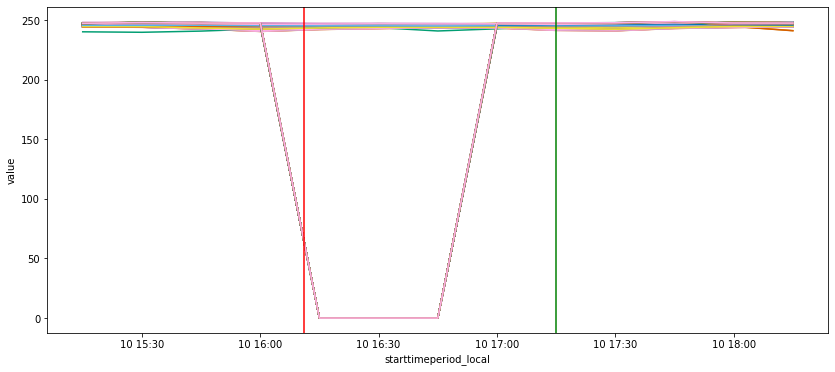

In [28]:
fig, ax = audit_i.plot_ami_around_outage(
    expand_time=pd.Timedelta('1H'), 
    slicer=None, 
    draw_legend=False, 
    fig_num=0, 
    x='starttimeperiod_local', 
    y='value', 
    hue='aep_premise_nb', 
)

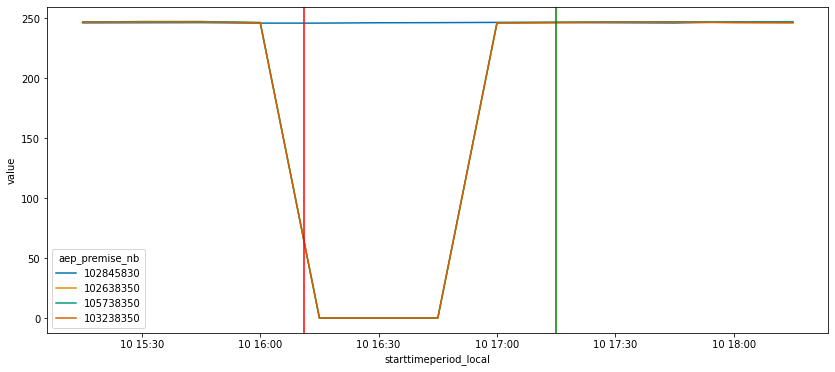

In [32]:
fig, ax = audit_i.plot_ami_around_outage(
    expand_time=pd.Timedelta('1H'), 
    slicer=DFSingleSlicer(
        column = 'aep_premise_nb', 
        value  = audit_i.ami_df_i['aep_premise_nb'].unique().tolist()[:4], 
        comparison_operator = 'isin'
    ), 
    draw_legend=True, 
    fig_num=0, 
    x='starttimeperiod_local', 
    y='value', 
    hue='aep_premise_nb', 
)

# Local data

In [ ]:
date_0 = '2024-01-28'
date_1 = '2024-02-03'
#-------------------------
save_dir_base = r'C:\Users\s346557\Documents\LocalData\dovs_check'
save_subdir = f"{date_0.replace('-','')}_{date_1.replace('-','')}"
#-----
base_dir     = os.path.join(save_dir_base, save_subdir)
base_dir_ami = os.path.join(save_dir_base, save_subdir, r'AllOPCOs\AMINonVee')
base_dir_ede = os.path.join(save_dir_base, save_subdir, r'AllOPCOs\EndEvents')
save_dir     = os.path.join(save_dir_base, save_subdir, r'AllOPCOs\Results')
#-----
assert(os.path.exists(base_dir_ami))
assert(os.path.exists(base_dir_ede))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [ ]:
outg_rec_nb_to_files_dict = DOVSAudit.get_outg_rec_nb_to_files_dict_ami(
    base_dir_dict   = base_dir,
    base_dir_data   = base_dir_ami, 
    rebuild         = False, 
    save_dict       = True
)
all_outg_rec_nbs = list(outg_rec_nb_to_files_dict.keys())
#-------------------------
outg_rec_nb_to_files_ede_dict = DOVSAudit.get_outg_rec_nb_to_files_dict_ede(
    base_dir_dict   = base_dir,
    base_dir_data   = base_dir_ede, 
    rebuild         = False, 
    save_dict       = True
)
all_outg_rec_nbs_ede = list(outg_rec_nb_to_files_ede_dict.keys())

In [ ]:
include_suboutg_endpt_plots=True

calculate_by_PN = True
# combine_by_PN_likeness_thresh = pd.Timedelta('1 minutes')
combine_by_PN_likeness_thresh = pd.Timedelta('15 minutes')

expand_outg_search_time_tight = pd.Timedelta('1 hours')
expand_outg_search_time_loose = pd.Timedelta('12 hours')
use_est_outg_times=False
# use_est_outg_times=True
use_full_ede_outgs=False
run_outg_inclusion_assessment=True
max_pct_PNs_missing_allowed=0
# max_pct_PNs_missing_allowed=20
#-----
expand_outg_est_search_time = expand_outg_search_time_loose
if use_est_outg_times:
    expand_outg_search_time = expand_outg_search_time_tight
else:
    expand_outg_search_time = expand_outg_search_time_loose

In [ ]:
n_PNs_w_power_threshold = 95

In [ ]:
#-------------------------
# Build dovs_df
dovs = DOVSOutages(
    df_construct_type=DFConstructType.kRunSqlQuery, 
    contstruct_df_args=None, 
    init_df_in_constructor=True,
    build_sql_function=DOVSOutages_SQL.build_sql_std_outage, 
    build_sql_function_kwargs=dict(
        outg_rec_nbs=all_outg_rec_nbs, 
        field_to_split='outg_rec_nbs', 
        include_premise=True
    ), 
    build_consolidated=True
)
dovs_df = dovs.df.copy()

In [ ]:
outg_rec_nb = all_outg_rec_nbs[0]

In [ ]:
#--------------------------------------------------
audit_i = DOVSAudit(
    outg_rec_nb=outg_rec_nb
)
audit_i.load_ami_from_csvs(
    paths                          = outg_rec_nb_to_files_dict[outg_rec_nb], 
    slicers                        = None, 
    ami_df_info_dict               = None, 
    run_std_init                   = True, 
    cols_and_types_to_convert_dict = None, 
    to_numeric_errors              = 'coerce', 
    drop_na_rows_when_exception    = True, 
    drop_unnamed0_col              = True, 
    pd_read_csv_kwargs             = None, 
    make_all_columns_lowercase     = False, 
    assert_all_cols_equal          = True, 
    min_fsize_MB                   = None
)
#--------------------------------------------------
if audit_i.ami_df_i.shape[0]==0:
    print('No AMI data!')
    assert(0)

#-------------------------
# Need to load dovs before running self assessment below
audit_i.load_dovs(
    dovs_df           = dovs_df, 
    dovs_df_info_dict = None
)

if run_outg_inclusion_assessment:
    to_include_i = audit_i.self_assess_outage_inclusion_requirements(max_pct_PNs_missing_allowed, None)
    if not to_include_i:
        print(f'outg_rec_nb={outg_rec_nb} did not pass inclusion requirements, skipping!!!!!')
        continue
#-------------------------    
n_SNs  = audit_i.ami_df_i['serialnumber'].nunique()
n_PNs  = audit_i.ami_df_i['aep_premise_nb'].nunique()

#----------------------------------------------------------------------------------------------------
# NOTE: Can save time by grabbing ede_df_i then performing tz conversion and adding DOVS
if outg_rec_nb not in outg_rec_nb_to_files_ede_dict.keys():
    ede_df_i=None
else:
    audit_i.load_ede_from_csvs(
        paths                          = outg_rec_nb_to_files_ede_dict[outg_rec_nb], 
        slicers                        = None, 
        ede_df_info_dict               = None, 
        run_std_init                   = True, 
        cols_and_types_to_convert_dict = None, 
        to_numeric_errors              = 'coerce', 
        drop_na_rows_when_exception    = True, 
        drop_unnamed0_col              = True, 
        pd_read_csv_kwargs             = None, 
        make_all_columns_lowercase     = False, 
        assert_all_cols_equal          = True, 
        min_fsize_MB                   = None
    )
#----------------------------------------------------------------------------------------------------
audit_i.build_best_ests_df()
#-------------------------
# Get the outage time from DOVS
dovs_outg_t_beg_end              = audit_i.dovs_outg_t_beg_end
dovs_outg_t_beg, dovs_outg_t_end = dovs_outg_t_beg_end
#-------------------------
# Get the CI and CMI from DOVS
ci_cmi_dovs       = audit_i.ci_cmi_dovs
ci_dovs, cmi_dovs = ci_cmi_dovs
#-------------------------
# Get the number of premises from DOVS
n_PNs_dovs = audit_i.n_PNs_dovs
#-------------------------
# Get the outage number from DOVS
outage_nb = audit_i.outage_nb

#--------------------------------------------------
# cnsrvtv_out_t_beg/_end are used for placing bounds on the plots generated
# If audit_i.best_ests_df has non-zero size (meaning the algorithm found outages), use to set plotting time.
# Otherwise, use dovs_outg_t_beg/_end
# NOTE: If one did not want to show any data which was thrown out due to overlapping, one would want to
#         update cnsrvtv_out_t_beg/_end after the identify_dovs_overlaps_from_best_ests procedure below 
#         (and subsequent trimming of audit_i.best_ests_df)
if audit_i.best_ests_df.shape[0]>0:
    cnsrvtv_out_t_beg = np.min([audit_i.best_ests_df['conservative_min'].min(), dovs_outg_t_beg])
    cnsrvtv_out_t_end = np.max([audit_i.best_ests_df['conservative_max'].max(), dovs_outg_t_end])
else:
    cnsrvtv_out_t_beg = dovs_outg_t_beg
    cnsrvtv_out_t_end = dovs_outg_t_end
#--------------------------------------------------
if audit_i.best_ests_df.shape[0]>0:
    # Identify and handle any overlaps with other DOVS events
    #-------------------------
    # dovs_sql_fcn=DOVSOutages_SQL.build_sql_std_outage
    dovs_sql_fcn=DOVSOutages_SQL.build_sql_outage
    audit_i.identify_overlaps(overlaps_dovs_sql_fcn = dovs_sql_fcn)
    #-------------------------
    # If any PN has one or more overlapping DOVS events, output info to file
    n_PNs_w_overlap = (audit_i.overlap_outgs_for_PNs_df['n_overlap']>0).sum()
    if n_PNs_w_overlap>0:
        print(f'Need to output to new file\n\tn_PNs_w_overlap={n_PNs_w_overlap}')
    #-------------------------
    # If any PN which lost power has one or more overlapping DOVS events, stop analysis
    n_out_PNs_w_overlap = audit_i.overlap_outgs_for_PNs_df[audit_i.overlap_outgs_for_PNs_df['lost_power']==True]['overlap_outg_rec_nbs'].apply(lambda x: len(x)>0).sum()
    if n_out_PNs_w_overlap>0:
        print('STOP analysis')
        continue
    #-------------------------
    audit_i.resolve_overlapping_audits()
    #-----
    ci_ami  = audit_i.ci
    cmi_ami = audit_i.cmi            
    #-------------------------
    ami_df_i = audit_i.ami_df_i.copy()
    # In ami_df_i, mark any entries which were essentially removed via the identify_dovs_overlaps_from_best_ests
    #   and removal procedure above
    ami_df_i = DOVSAudit.set_removed_due_to_overlap_in_ami_df_i(
        ami_df_i                   = ami_df_i, 
        best_ests_df               = audit_i.best_ests_df_w_keep_info.copy(), 
        PN_col                     = 'aep_premise_nb', 
        time_idfr                  = 'starttimeperiod_local', 
        PN_col_be                  = 'PN', 
        keep_col_be                = 'keep', 
        overlap_times_col_be       = 'overlap_times', 
        removed_due_to_overlap_col = 'removed_due_to_overlap'
    )
else:
    ci_ami  = 0
    cmi_ami = 0
    ami_df_i = audit_i.ami_df_i.copy()
#--------------------------------------------------
if audit_i.best_ests_df.shape[0]>0:
    best_ests_df_dovs_beg = DOVSAudit.alter_best_ests_df_using_dovs_outg_t_beg(
        best_ests_df = audit_i.best_ests_df,
        dovs_df      = dovs_df, 
        outg_rec_nb  = outg_rec_nb
    )
    if calculate_by_PN:
        ci_ami_dovs_beg  = best_ests_df_dovs_beg['PN'].nunique()
    else:
        ci_ami_dovs_beg  = best_ests_df_dovs_beg['SN'].nunique()
    cmi_ami_dovs_beg = (best_ests_df_dovs_beg['winner_max']-best_ests_df_dovs_beg['winner_min']).sum().total_seconds()/60
else:
    best_ests_df_dovs_beg = audit_i.best_ests_df.copy()
    ci_ami_dovs_beg  = ci_ami
    cmi_ami_dovs_beg = cmi_ami        
#--------------------------------------------------
dovs_df_i = DOVSOutages.retrieve_outage_from_dovs_df(
    dovs_df                  = dovs_df, 
    outg_rec_nb              = audit_i.outg_rec_nb, 
    outg_rec_nb_idfr         = 'index', 
    assert_outg_rec_nb_found = True
)    
#--------------------------------------------------
if audit_i.best_ests_df.shape[0]>0:
    means_df, best_ests_df_w_db_lbl = DOVSAudit.get_mean_times_w_dbscan(
        best_ests_df                  = audit_i.best_ests_df, 
        eps_min                       = 5, 
        min_samples                   = 2, 
        ests_to_include_in_clustering = ['winner_min', 'winner_max'],
        ests_to_include_in_output     = [
            'winner_min', 'winner_max', 
            'conservative_min', 'conservative_max', 
            'zero_times_min', 'zero_times_max'
        ], 
        return_labelled_best_ests_df  = True
    )
    #-------------------------
    n_PNs_w_power_srs = DOVSAudit.build_n_PNs_w_power_srs(
        best_ests_df  = audit_i.best_ests_df, 
        ami_df_i      = ami_df_i, 
        return_pct    = True, 
        PN_col        = 'PN', 
        t_min_col     = 'winner_min', 
        t_max_col     = 'winner_max', 
        i_outg_col    = 'i_outg', 
        PN_col_ami_df = 'aep_premise_nb'
    )        
    #-------------------------
    detailed_summary_df_i = DOVSAudit.build_detailed_summary_df(
        means_df              = means_df, 
        best_ests_df_w_db_lbl = best_ests_df_w_db_lbl,
        CI_tot                = ci_ami, 
        CMI_tot               = cmi_ami, 
        n_PNs_ami             = n_PNs,
        outg_rec_nb           = outg_rec_nb, 
        dovs_df_i             = dovs_df_i, 
        warnings_flag         = audit_i.warnings_flag, 
        db_label_col          = 'db_label', 
        winner_min_col        = 'winner_min', 
        winner_max_col        = 'winner_max', 
        PN_col                = 'PN' if calculate_by_PN else 'SN', 
        i_outg_col            = 'i_outg'
    )
    #----------
    detailed_summary_df_i[f'first_above_thresh ({n_PNs_w_power_threshold})'] = None
    detailed_summary_df_i[f'last_above_thresh ({n_PNs_w_power_threshold})']  = None
    frst_abv, last_abv = get_first_last_above_threshold(
        n_PNs_w_power_srs = n_PNs_w_power_srs, 
        threshold         = n_PNs_w_power_threshold
    )
    #-----
    detailed_summary_df_i.iloc[
        0, 
        detailed_summary_df_i.columns.tolist().index(f'first_above_thresh ({n_PNs_w_power_threshold})')
    ] = frst_abv
    #-----
    detailed_summary_df_i.iloc[
        0, 
        detailed_summary_df_i.columns.tolist().index(f'last_above_thresh ({n_PNs_w_power_threshold})')
    ] = last_abv        
    #-------------------------
    all_detailed_summary_dfs.append(detailed_summary_df_i)

    #-------------------------
    warnings_text += audit_i.generate_warnings_text()
else:
    means_df, best_ests_df_w_db_lbl = None, None
    n_PNs_w_power_srs = None
#--------------------------------------------------
if best_ests_df_dovs_beg.shape[0]>0:
    means_df_dovs_beg, best_ests_df_dovs_beg_w_db_lbl = DOVSAudit.get_mean_times_w_dbscan(
        best_ests_df                  = best_ests_df_dovs_beg, 
        eps_min                       = 5, 
        min_samples                   = 2, 
        ests_to_include_in_clustering = ['winner_min', 'winner_max'],
        ests_to_include_in_output     = [
            'winner_min', 'winner_max', 
            'conservative_min', 'conservative_max', 
            'zero_times_min', 'zero_times_max'
        ], 
        return_labelled_best_ests_df  = True
    )
    #-------------------------
    n_PNs_w_power_srs_dovs_beg = DOVSAudit.build_n_PNs_w_power_srs(
        best_ests_df  = best_ests_df_dovs_beg, 
        ami_df_i      = ami_df_i, 
        return_pct    = True, 
        PN_col        = 'PN', 
        t_min_col     = 'winner_min', 
        t_max_col     = 'winner_max', 
        i_outg_col    = 'i_outg', 
        PN_col_ami_df = 'aep_premise_nb'
    )        
    #-------------------------
    detailed_summary_df_dovs_beg_i = DOVSAudit.build_detailed_summary_df(
        means_df              = means_df_dovs_beg, 
        best_ests_df_w_db_lbl = best_ests_df_dovs_beg_w_db_lbl,
        CI_tot                = ci_ami_dovs_beg, 
        CMI_tot               = cmi_ami_dovs_beg, 
        n_PNs_ami             = n_PNs,
        outg_rec_nb           = outg_rec_nb, 
        dovs_df_i             = dovs_df_i, 
        warnings_flag         = audit_i.warnings_flag, 
        db_label_col          = 'db_label', 
        winner_min_col        = 'winner_min', 
        winner_max_col        = 'winner_max', 
        PN_col                = 'PN' if calculate_by_PN else 'SN', 
        i_outg_col            = 'i_outg'
    )
    #----------
    detailed_summary_df_dovs_beg_i[f'first_above_thresh ({n_PNs_w_power_threshold})'] = None
    detailed_summary_df_dovs_beg_i[f'last_above_thresh ({n_PNs_w_power_threshold})']  = None
    frst_abv, last_abv = get_first_last_above_threshold(
        n_PNs_w_power_srs = n_PNs_w_power_srs_dovs_beg, 
        threshold         = n_PNs_w_power_threshold
    )
    #-----
    detailed_summary_df_dovs_beg_i.iloc[
        0, 
        detailed_summary_df_dovs_beg_i.columns.tolist().index(f'first_above_thresh ({n_PNs_w_power_threshold})')
    ] = frst_abv
    #-----
    detailed_summary_df_dovs_beg_i.iloc[
        0, 
        detailed_summary_df_dovs_beg_i.columns.tolist().index(f'last_above_thresh ({n_PNs_w_power_threshold})')
    ] = last_abv        
    #-------------------------
    all_detailed_summary_dfs_dovs_beg.append(detailed_summary_df_dovs_beg_i)
else:
    means_df_dovs_beg, best_ests_df_dovs_beg_w_db_lbl = None, None
#-------------------------
ci_cmi_summary_df = pd.concat([
    ci_cmi_summary_df, 
    pd.DataFrame(
        dict(
            outg_rec_nb=outg_rec_nb, 
            ci_dovs=ci_dovs,   ci_ami=ci_ami, ci_ami_dovs_beg=ci_ami_dovs_beg, 
            cmi_dovs=cmi_dovs, cmi_ami=cmi_ami, cmi_ami_dovs_beg=cmi_ami_dovs_beg
        ), 
        index=[ci_cmi_summary_df.shape[0]]
    )
])
#----------------------------------------------------------------------------------------------------
# ######################### PLOTTING #########################
#----------------------------------------------------------------------------------------------------
#--------------------------------------------------
# Instead of using get_full_part_not_outage_subset_dfs, simply grab the PNs which suffered
#   outages from best_ests_df
if audit_i.best_ests_df.shape[0]>0:
    outg_SNs = audit_i.best_ests_df['PN'].unique().tolist()
    removed_due_to_overlap_col = 'removed_due_to_overlap'
else:
    outg_SNs = []
    removed_due_to_overlap_col = None
#-----
ami_df_i_out      = ami_df_i[ami_df_i['aep_premise_nb'].isin(outg_SNs)]
ami_df_i_not_out  = ami_df_i[~ami_df_i['aep_premise_nb'].isin(outg_SNs)]  

#--------------------------------------------------
if audit_i.best_ests_df_w_keep_info is not None and audit_i.best_ests_df_w_keep_info.shape[0]>0:
    ptntl_ovrlp_outg_rec_nbs = list(set(audit_i.best_ests_df_w_keep_info['overlap_DOVS'].sum()))
    if len(ptntl_ovrlp_outg_rec_nbs)>0:
        ovrlp_dovs = DOVSOutages(
            df_construct_type=DFConstructType.kRunSqlQuery, 
            contstruct_df_args=None, 
            init_df_in_constructor=True,
            build_sql_function=DOVSOutages_SQL.build_sql_outage, 
            build_sql_function_kwargs=dict(
                outg_rec_nbs=ptntl_ovrlp_outg_rec_nbs, 
                include_premise=True
            ), 
            build_consolidated=True
        )
        other_dovs_events_df = ovrlp_dovs.df.reset_index().copy()
    else:
        other_dovs_events_df = None
else:
    other_dovs_events_df = None

#----------------------------------------------------------------------------------------------------
fig, axs = plot_all_out_not_NEW(
    fig_num                    = fig_num, 
    ami_df_i                   = ami_df_i, 
    ami_df_i_out               = ami_df_i_out, 
    ami_df_i_not_out           = ami_df_i_not_out, 
    dovs_outg_t_beg            = dovs_outg_t_beg, 
    dovs_outg_t_end            = dovs_outg_t_end, 
    cnsrvtv_out_t_beg          = cnsrvtv_out_t_beg, 
    cnsrvtv_out_t_end          = cnsrvtv_out_t_end, 
    means_df                   = means_df, 
    outg_rec_nb                = outg_rec_nb, 
    outage_nb                  = outage_nb, 
    n_PNs_dovs                 = n_PNs_dovs, 
    ci_dovs                    = ci_dovs, 
    cmi_dovs                   = cmi_dovs, 
    ci_ami                     = ci_ami, 
    cmi_ami                    = cmi_ami, 
    name                       = 'AMI', 
    results_2_dict             = dict(
        ci_ami   = ci_ami_dovs_beg, 
        cmi_ami  = cmi_ami_dovs_beg, 
        means_df = means_df_dovs_beg, 
        name = 'AMI w/ DOVS t_beg'
    ), 
    expand_time                = pd.Timedelta('1 hour'), 
    removed_due_to_overlap_col = removed_due_to_overlap_col, 
    mean_keys_to_include       = ['winner', 'conservative', 'zero_times'], 
    default_subplots_args      = dict(n_x=2, n_y=2, row_major=True, sharex=True), 
    other_dovs_events_df       = other_dovs_events_df, 
    leg_i_plot                 = 1, 
    leg_kwargs                 = dict(ncols=1, fontsize=15, bbox_to_anchor=(1, 1.2)), 
    ci_info_fontsize           = 16, 
    left_text_x                = 0.915  
)

if n_PNs_w_power_srs is not None:
    fig, axs[3] = DOVSAudit.plot_n_PNs_w_power_srs(
        n_PNs_w_power_srs = n_PNs_w_power_srs, 
        simp_freq         = '1T', 
        threshold         = n_PNs_w_power_threshold, 
        fig_num           = fig_num, 
        fig_ax            = (fig, axs[3]), 
        threshold_color   = 'magenta'
    )

for ax_i in axs:
    ax_i.xaxis.set_tick_params(labelbottom=True)

fig_num += 1
pdf.savefig(fig, bbox_inches='tight')
if include_suboutg_endpt_plots:
    pdf_2.savefig(fig, bbox_inches='tight')
plt.close(fig)

#----------------------------------------------------------------------------------------------------
if means_df_dovs_beg is not None:
    fig, axs = plot_all_out_not_NEW(
        fig_num              = fig_num, 
        ami_df_i             = ami_df_i, 
        ami_df_i_out         = ami_df_i_out, 
        ami_df_i_not_out     = ami_df_i_not_out, 
        dovs_outg_t_beg      = dovs_outg_t_beg, 
        dovs_outg_t_end      = dovs_outg_t_end, 
        cnsrvtv_out_t_beg    = cnsrvtv_out_t_beg, 
        cnsrvtv_out_t_end    = cnsrvtv_out_t_end, 
        means_df             = means_df_dovs_beg, 
        outg_rec_nb          = outg_rec_nb, 
        outage_nb            = outage_nb, 
        n_PNs_dovs           = n_PNs_dovs, 
        ci_dovs              = ci_dovs, 
        cmi_dovs             = cmi_dovs, 
        ci_ami               = ci_ami_dovs_beg, 
        cmi_ami              = cmi_ami_dovs_beg, 
        name                 = 'AMI w/ DOVS t_beg', 
        results_2_dict       = dict(
            ci_ami   = ci_ami, 
            cmi_ami  = cmi_ami, 
            means_df = means_df, 
            name = 'AMI'
        ), 
        expand_time          = pd.Timedelta('1 hour'), 
        removed_due_to_overlap_col = removed_due_to_overlap_col, 
        mean_keys_to_include = ['winner', 'conservative', 'zero_times'], 
        default_subplots_args      = dict(n_x=2, n_y=2, row_major=True, sharex=True), 
        other_dovs_events_df       = other_dovs_events_df, 
        leg_i_plot                 = 1, 
        leg_kwargs                 = dict(ncols=1, fontsize=15, bbox_to_anchor=(1, 1.2)), 
        ci_info_fontsize           = 16, 
        left_text_x                = 0.915  
    )

    if n_PNs_w_power_srs_dovs_beg is not None:
        fig, axs[3] = DOVSAudit.plot_n_PNs_w_power_srs(
            n_PNs_w_power_srs = n_PNs_w_power_srs_dovs_beg, 
            simp_freq         = '1T', 
            threshold         = n_PNs_w_power_threshold, 
            fig_num           = fig_num, 
            fig_ax            = (fig, axs[3]), 
            threshold_color   = 'magenta'
        )

    for ax_i in axs:
        ax_i.xaxis.set_tick_params(labelbottom=True)

    fig_num += 1
    pdf_dovs_beg.savefig(fig, bbox_inches='tight')
    plt.close(fig)

#----------------------------------------------------------------------------------------------------
if means_df is not None and include_suboutg_endpt_plots:
    fig, axs = plot_suboutg_endpts(
        fig_num               = fig_num, 
        ami_df_i              = ami_df_i, 
        means_df              = means_df, 
        best_ests_df_w_db_lbl = best_ests_df_w_db_lbl, 
        dovs_outg_t_beg       = dovs_outg_t_beg, 
        dovs_outg_t_end       = dovs_outg_t_end, 
        outg_rec_nb           = outg_rec_nb, 
        expand_time           = pd.Timedelta('15 minutes'), 
        mean_keys_to_include  = ['winner', 'conservative', 'zero_times']
    )
    #-------------------------
    fig_num += 1
    pdf_2.savefig(fig, bbox_inches='tight')     
    plt.close(fig)

#----------------------------------------------------------------------------------------------------
if audit_i.best_ests_df.shape[0]>0:
    _, fig, ax = DOVSAudit.build_n_PNs_w_power_srs_and_plot(
        best_ests_df  = audit_i.best_ests_df, 
        ami_df_i      = ami_df_i, 
        return_pct    = True, 
        simp_freq     = '1T', 
        threshold     = n_PNs_w_power_threshold, 
        fig_num       = fig_num, 
        title         = f"OUTG_REC_NB = {outg_rec_nb}", 
        PN_col        = 'PN', 
        t_min_col     = 'winner_min', 
        t_max_col     = 'winner_max', 
        i_outg_col    = 'i_outg', 
        PN_col_ami_df = 'aep_premise_nb'
    )
    #-------------------------
    fig_num += 1
    pdf_n_w_power.savefig(fig, bbox_inches='tight')     
    plt.close(fig)
#----------------------------------------------------------------------------------------------------
if best_ests_df_dovs_beg.shape[0]>0:
    _, fig, ax = DOVSAudit.build_n_PNs_w_power_srs_and_plot(
        best_ests_df  = best_ests_df_dovs_beg, 
        ami_df_i      = ami_df_i, 
        return_pct    = True, 
        simp_freq     = '1T', 
        threshold     = n_PNs_w_power_threshold, 
        fig_num       = fig_num, 
        title         = f"OUTG_REC_NB = {outg_rec_nb}", 
        PN_col        = 'PN', 
        t_min_col     = 'winner_min', 
        t_max_col     = 'winner_max', 
        i_outg_col    = 'i_outg', 
        PN_col_ami_df = 'aep_premise_nb'
    )
    #-------------------------
    fig_num += 1
    pdf_n_w_power_dovs_beg.savefig(fig, bbox_inches='tight')     
    plt.close(fig)

# ----------------------------------------------------------------------------------------------------
# DATA ACQUISITION (DAQ)
# ----------------------------------------------------------------------------------------------------

In [ ]:
save_dfs=True

date_0 = '2024-01-28'
date_1 = '2024-02-03'
states=None
# opcos='oh'
opcos=None
CI_NB_min=15
# CI_NB_min=None
conn_outages = Utilities.get_utldb01p_oracle_connection()
#--------------------------------------------------
# For this DAQ, I am doing one opco at a time
# assert(isinstance(opcos, str))
save_dir_base = r'C:\Users\s346557\Documents\LocalData\dovs_check'
save_subdir = f"{date_0.replace('-','')}_{date_1.replace('-','')}"
save_dir_base = os.path.join(save_dir_base, save_subdir)
if opcos:
    save_dir_base = os.path.join(save_dir_base, opcos)
else:
    save_dir_base = os.path.join(save_dir_base, 'AllOPCOs')
if not os.path.exists(save_dir_base):
    os.makedirs(save_dir_base)

In [ ]:
#--------------------------------------------------
sql_outage_full = DOVSOutages_SQL.build_sql_std_outage(
    mjr_mnr_cause=None, 
    include_premise=True, 
    date_range=[date_0, date_1], 
    states=states, 
    opcos=opcos, 
    CI_NB_min=CI_NB_min
).get_sql_statement()
#-----
print(f'sql_outage_full:\n{sql_outage_full}\n\n')
#-----
df_outage_OG = pd.read_sql_query(
    sql_outage_full, 
    conn_outages, 
    dtype={
        'CI_NB':np.int32, 
        'CMI_NB':np.float64, 
        'OUTG_REC_NB':np.int32
    }
)
#-----
print(f"df_outage_OG.shape = {df_outage_OG.shape}")
print(f"# OUTG_REC_NBs     = {df_outage_OG['OUTG_REC_NB'].nunique()}")

In [ ]:
#-------------------------
if save_dfs:
    df_outage_OG.to_pickle(os.path.join(save_dir_base, 'df_outage.pkl'))
#-------------------------
outg_rec_nbs_all = df_outage_OG['OUTG_REC_NB'].unique().tolist()
df_outage = df_outage_OG.copy()

In [ ]:
start=time.time()
#-----
# df_mp_outg_OG = build_active_MP_for_xfmrs_in_outages_df(
#     df_outage=df_outage, 
#     prem_nb_col='PREMISE_NB', 
#     is_slim=False, 
#     addtnl_mp_df_curr_cols=['technology_tx'], 
#     addtnl_mp_df_hist_cols=['technology_tx']
# )
# #-----
# print(f'Time for build_active_MP_for_xfmrs_in_outages_df: {time.time()-start}')
df_mp_outg_OG = build_active_MP_for_outages_df(
    df_outage=df_outage, 
    prem_nb_col='PREMISE_NB', 
    is_slim=False, 
    addtnl_mp_df_curr_cols=['technology_tx'], 
    addtnl_mp_df_hist_cols=['technology_tx'], 
    assert_all_PNs_found=False
)
#-----
print(f'Time for build_active_MP_for_outages_df: {time.time()-start}')
start=time.time()
#-----
df_mp_outg_OG['inst_ts'] = pd.to_datetime(df_mp_outg_OG['inst_ts'])
df_mp_outg_OG['rmvl_ts'] = pd.to_datetime(df_mp_outg_OG['rmvl_ts'])
#-------------------------
if save_dfs:
    df_mp_outg_OG.to_pickle(os.path.join(save_dir_base, 'df_mp_outg_b4_dupl_rmvl.pkl'))
#-------------------------
df_mp_outg = MeterPremise.drop_approx_mp_duplicates(
    mp_df = df_mp_outg_OG.copy(), 
    fuzziness=pd.Timedelta('1 hour'), 
    assert_single_overlap=True, 
    addtnl_groupby_cols=['OUTG_REC_NB', 'technology_tx'], 
    gpby_dropna=False
)
#-----
print(f'Time for drop_approx_mp_duplicates: {time.time()-start}')
#-------------------------
if save_dfs:
    df_mp_outg.to_pickle(os.path.join(save_dir_base, 'df_mp_outg.pkl'))
#-------------------------

In [ ]:
# Some premises are listed in DOVS are simply not found in AMI
print(f"#PNs DOVS: {df_outage['PREMISE_NB'].nunique()}")
print(f"#PNs AMI:  {df_mp_outg['prem_nb'].nunique()}")

In [ ]:
# Really only want one entry per meter (here, meter being a mfr_devc_ser_nbr/prem_nb combination)
# ALthough drop_duplicates was used, multiple entries could still exist if, e.g., a meter has two
#   non-fuzzy-overlapping intervals
assert(all(df_mp_outg[['mfr_devc_ser_nbr', 'prem_nb', 'OUTG_REC_NB']].value_counts()==1))

# # Simple-minded (if assertion fails): Let's just keep the one with the most recent install date
# df_mp_outg = df_mp_outg.iloc[df_mp_outg.reset_index().groupby(['mfr_devc_ser_nbr', 'prem_nb', 'OUTG_REC_NB'])['inst_ts'].idxmax()]
# assert(all(df_mp_outg[['mfr_devc_ser_nbr', 'prem_nb', 'OUTG_REC_NB']].value_counts()==1))

In [ ]:
# # Keep only trsf_pole_nbs with all meters of type AMI
# df_mp_outg_ami = df_mp_outg.groupby(['trsf_pole_nb']).filter(lambda x: all(x['technology_tx']=='AMI'))

# Keep only outages with all meters of typr AMI
df_mp_outg_ami = df_mp_outg.groupby(['OUTG_REC_NB']).filter(lambda x: all(x['technology_tx']=='AMI'))
#-------------------------
if save_dfs:
    df_mp_outg_ami.to_pickle(os.path.join(save_dir_base, 'df_mp_outg_ami.pkl'))
#-------------------------

In [ ]:
ami_outg_rec_nbs = df_mp_outg_ami['OUTG_REC_NB'].unique().tolist()
df_outage_ami = df_outage[df_outage['OUTG_REC_NB'].isin(ami_outg_rec_nbs)]

# NOTE:
- Here, when running batch DAQ, we need to merge DOVS with MP so we can group by trsf_pole_nb later when actually running the DAQ
- This is mainly a convenience thing, so that (along with OUTG_REC_NB and operating company info) are ready in the output DAQ files (otherwise, I would have to populate these data at run time, which would be annoying)

In [ ]:
df_outage_ami_w_mp = DOVSOutages.merge_df_outage_with_mp(
    df_outage=df_outage_ami.copy(), 
    df_mp=df_mp_outg_ami, 
    merge_on_outg=['OUTG_REC_NB', 'PREMISE_NB'], 
    merge_on_mp=['OUTG_REC_NB', 'prem_nb'], 
    cols_to_include_mp=None, 
    drop_cols = None, 
    rename_cols=None, 
    inplace=True
)
#-------------------------
if save_dfs:
    df_outage_ami_w_mp.to_pickle(os.path.join(save_dir_base, 'df_outage_ami_w_mp.pkl'))
#-------------------------

In [ ]:
df_outage_ami_w_mp_slim = DOVSOutages.consolidate_df_outage(
    df_outage_ami_w_mp, 
    addtnl_grpby_cols=['trsf_pole_nb'], 
    set_outg_rec_nb_as_index=False, 
    gpby_dropna=False
)

In [ ]:
df_outage_ami_w_mp_slim = DOVSOutages.set_search_time_in_outage_df(
    df_outage=df_outage_ami_w_mp_slim, 
    search_time_half_window=pd.Timedelta('24 hours')
)
#-------------------------
if save_dfs:
    df_outage_ami_w_mp_slim.to_pickle(os.path.join(save_dir_base, 'df_outage_ami_w_mp_slim.pkl'))
#-------------------------

In [ ]:
# The following will find OUTG_REC_NB, trsf_pole_nb groups (since DOVSOutages.consolidate_df_outage was run with 
#   addtnl_grpby_cols=['trsf_pole_nb']) for which the PNs found by DOVS are not equal to those found in MP
# BUT, if they're missing from MP, does this necessarily mean they'll be missing from interval data?!
#   SO, I'm not 100% sure whether or not these should be eliminated at this stage.
#   Keeping them at this point will just lead to a slightly longer data collection time.
#   If they should be left out, the functionality of check_DOVS will eliminate them
df_outg_missing_PNs = df_outage_ami_w_mp_slim[df_outage_ami_w_mp_slim.apply(
    lambda x: len(set(x['PREMISE_NBS']).symmetric_difference(set(x['prem_nb'])))!=0, 
    axis=1
)]
outg_rec_nbs_to_exclude = df_outg_missing_PNs['OUTG_REC_NB'].unique().tolist()
#-----
df_exclude_missing = df_outage_ami_w_mp_slim[~df_outage_ami_w_mp_slim['OUTG_REC_NB'].isin(outg_rec_nbs_to_exclude)]
#-----
print('With excluding outages with premises missing from MP')
print(f"# Outages: {df_exclude_missing['OUTG_REC_NB'].nunique()}")
print(f"#PNs DOVS: {len(set(df_exclude_missing['PREMISE_NBS'].sum()))}")
print(f"#PNs AMI:  {len(set(df_exclude_missing['prem_nb'].sum()))}")
print()
#-----
print('Without excluding outages with premises missing from MP')
print(f"# Outages: {df_outage_ami_w_mp_slim['OUTG_REC_NB'].nunique()}")
print(f"#PNs DOVS: {len(set(df_outage_ami_w_mp_slim['PREMISE_NBS'].sum()))}")
print(f"#PNs AMI:  {len(set(df_outage_ami_w_mp_slim['prem_nb'].sum()))}")

## AMI NonVee

In [ ]:
#-------------------------
usg_split_to_CTEs=True
df_construct_type=DFConstructType.kRunSqlQuery
contstruct_df_args_ami=None
# addtnl_groupby_cols=['OUTG_REC_NB', 'trsf_pole_nb']
addtnl_groupby_cols=['OUTG_REC_NB', 'trsf_pole_nb', 'OPERATING_UNIT_ID']

cols_of_interest_ami = TableInfos.AMINonVee_TI.std_columns_of_interest
# batch_size=100
batch_size=25
verbose=True
n_update=1

In [ ]:
ami_sql_function_kwargs = dict(
    cols_of_interest=cols_of_interest_ami, 
    df_outage=df_outage_ami_w_mp_slim, 
    split_to_CTEs=usg_split_to_CTEs, 
    join_mp_args=False, 
    df_args = dict(
        addtnl_groupby_cols=addtnl_groupby_cols, 
        mapping_to_ami={'PREMISE_NBS':'premise_nbs'}, 
        is_df_consolidated=True
    ), 
    field_to_split='df_outage', 
    field_to_split_location_in_kwargs=['df_outage'], 
    save_and_dump=True,  
    sort_coll_to_split=True,
    batch_size=batch_size, verbose=verbose, n_update=n_update
)
addtnl_ami_sql_function_kwargs = dict(
    build_sql_function_kwargs=dict(opco=opcos)
)
ami_sql_function_kwargs = {**ami_sql_function_kwargs, 
                           **addtnl_ami_sql_function_kwargs}


save_args = dict(
    save_to_file=True, 
    save_dir = os.path.join(save_dir_base, 'AMINonVee'), 
    save_name=r'ami_nonvee.csv', 
    index=True
)

In [ ]:
# start=time.time()

# while True:
#     try:
#         ami_nonvee = AMINonVee(
#             df_construct_type=df_construct_type, 
#             contstruct_df_args = contstruct_df_args_ami, 
#             build_sql_function=AMINonVee_SQL.build_sql_usg_for_outages, 
#             build_sql_function_kwargs=ami_sql_function_kwargs, 
#             init_df_in_constructor=True, 
#             save_args=save_args
#         )
#         break # stop the loop if the function completes sucessfully
#     except Exception as e:
#         print("Function errored out!", e)
#         print("Retrying ... ")
        
# build_time = time.time()-start
# print(build_time)

In [ ]:
start=time.time()

exit_status = Utilities.run_tryexceptwhile_process(
    func                = AMINonVee,
    func_args_dict      = dict(
        df_construct_type         = df_construct_type, 
        contstruct_df_args        = contstruct_df_args_ami, 
        build_sql_function        = AMINonVee_SQL.build_sql_usg_for_outages, 
        build_sql_function_kwargs = ami_sql_function_kwargs, 
        init_df_in_constructor    = True, 
        save_args                 = save_args
    ), 
    max_calls_per_min   = 1, 
    lookback_period_min = 15, 
    max_calls_absolute  = 1000, 
    verbose             = True
)
print(f'exit_status = {exit_status}')

build_time = time.time()-start
print(build_time)

# AMI End Events

In [ ]:
#-------------------------
usg_split_to_CTEs=True
df_construct_type=DFConstructType.kRunSqlQuery
contstruct_df_args_end_events=None
# addtnl_groupby_cols=['OUTG_REC_NB', 'trsf_pole_nb']
addtnl_groupby_cols=['OUTG_REC_NB', 'trsf_pole_nb', 'OPERATING_UNIT_ID']

cols_of_interest_end_dev_event = TableInfos.AMIEndEvents_TI.std_columns_of_interest
batch_size=100
verbose=True
n_update=1

In [ ]:
end_events_sql_function_kwargs = dict(
    cols_of_interest=cols_of_interest_end_dev_event, 
    df_outage=df_outage_ami_w_mp_slim, 
    split_to_CTEs=usg_split_to_CTEs, 
    join_mp_args=False, 
    df_args = dict(
        addtnl_groupby_cols=addtnl_groupby_cols, 
        mapping_to_ami={'PREMISE_NBS':'premise_nbs'}, 
        is_df_consolidated=True
    ), 
    field_to_split='df_outage', 
    field_to_split_location_in_kwargs=['df_outage'], 
    save_and_dump=True, 
    sort_coll_to_split=True,
    batch_size=batch_size, verbose=verbose, n_update=n_update
)
addtnl_end_events_sql_function_kwargs = dict(
    build_sql_function_kwargs=dict(opco=opcos)
)
end_events_sql_function_kwargs = {**end_events_sql_function_kwargs, 
                                  **addtnl_end_events_sql_function_kwargs}

end_events_save_args = dict(
    save_to_file=True, 
    save_dir = os.path.join(save_dir_base, 'EndEvents'), 
    save_name=r'end_events.csv', 
    index=True
)

In [ ]:
# start=time.time()

# while True:
#     try:
#         end_events = AMIEndEvents(
#             df_construct_type=df_construct_type, 
#             contstruct_df_args = contstruct_df_args_end_events, 
#             build_sql_function=AMIEndEvents_SQL.build_sql_end_events_for_outages, 
#             build_sql_function_kwargs=end_events_sql_function_kwargs, 
#             init_df_in_constructor=True, 
#             save_args=end_events_save_args
#         )
#         break # stop the loop if the function completes sucessfully
#     except Exception as e:
#         print("Function errored out!", e)
#         print("Retrying ... ")
        
# end_events_build_time = time.time()-start
# print(end_events_build_time)

In [ ]:
start=time.time()

exit_status = Utilities.run_tryexceptwhile_process(
    func                = AMIEndEvents,
    func_args_dict      = dict(
        df_construct_type         = df_construct_type, 
        contstruct_df_args        = contstruct_df_args_end_events, 
        build_sql_function        = AMIEndEvents_SQL.build_sql_end_events_for_outages, 
        build_sql_function_kwargs = end_events_sql_function_kwargs, 
        init_df_in_constructor    = True, 
        save_args                 = end_events_save_args
    ), 
    max_calls_per_min   = 1, 
    lookback_period_min = 15, 
    max_calls_absolute  = 1000, 
    verbose             = True
)
print(f'exit_status = {exit_status}')

build_time = time.time()-start
print(build_time)

# NOTE:
This is a somewhat simple-minded example, as I am naively joining the meter_events.end_device_event table with default.meter_premise table.
<br>As we have discussed, to correctly join with meter_premise, one must determine which meters were active AT THE TIME IN QUESTION (i.e., on 2022-10-01), not those simply in default.meter_premise.
<br>Thus, to be completely correct, one should use methods contained in the MeterPremise class.
<br>However, for the purposes here, this simple-minded join is acceptable.

In [ ]:
# Build AMIEndEvents object housing data from the meter_events.end_device_event table.
# Events are collected from those meters having aep_opco='oh' on the date '2022-10-01'
ami_ede = AMIEndEvents(
    df_construct_type=DFConstructType.kRunSqlQuery, 
    contstruct_df_args=None, 
    init_df_in_constructor=True, 
    build_sql_function=None, 
    build_sql_function_kwargs=dict(
        cols_of_interest=TableInfos.AMIEndEvents_TI.std_columns_of_interest, 
        opco='oh', 
        date_range=['2022-10-01', '2022-10-01'], 
        join_mp_args=dict(
            join_with_CTE=True, 
            build_mp_kwargs=dict(cols_of_interest=TableInfos.MeterPremise_TI.std_columns_of_interest), 
            join_type='LEFT', 
            list_of_columns_to_join=[
                ['serialnumber', 'mfr_devc_ser_nbr'], 
                ['aep_premise_nb', 'prem_nb']
            ]
        )
    ), 
    save_args=False
)

In [ ]:
# The SQL statement run by the above block is printed below
print(ami_ede.get_sql_statement())

In [ ]:
# Grab the pandas.DataFrame (DF) object from ami_ede
end_events_df = ami_ede.df.copy()
# Also, grab the full list of reasons found
reasons_full = sorted(end_events_df['reason'].unique().tolist())

In [ ]:
# Print some basic info about the DF
print(f'end_events_df.shape = {end_events_df.shape}')
print(f"Number of unique reasons = {end_events_df['reason'].nunique()}")
end_events_df.head()

# -------------------------

In [ ]:
# Below, when running reduce_end_event_reasons_in_df, the default behavior (placement_col=None) is to simply replace
#   the entries in the 'reason' column by their reduced versions.
# For purposes here, I will keep both the full reason column (renamed to 'reason_full') and the reduced reason column (named 'reason')

print(f'end_events_df.shape[0]                          = {end_events_df.shape[0]}')
print(f"end_events_df['serialnumber'].nunique()         = {end_events_df['serialnumber'].nunique()}")
print(f"end_events_df['enddeviceeventtypeid'].nunique() = {end_events_df['enddeviceeventtypeid'].nunique()}")
print('\n\n')

end_events_df = end_events_df.rename(columns={'reason':'reason_full'})
end_events_df = AMIEndEvents.reduce_end_event_reasons_in_df(
    df=end_events_df, 
    reason_col='reason_full', 
    placement_col='reason'
)

print('BEFORE REASON REDUCTION')
print(f"end_events_df['reason'].nunique()               = {end_events_df['reason_full'].nunique()}")
print('AFTER REASON REDUCTION')
print(f"end_events_df['reason'].nunique()               = {end_events_df['reason'].nunique()}")

In [ ]:
# Grab the unique reasons after the reduction (rdcd=='reduced')
reasons_rdcd_1 = sorted(end_events_df['reason'].unique().tolist())

In [ ]:
reasons_rdcd_1

# -------------------------

In [ ]:
# Create a mapping of the full reasons captured in each reason
reasons_to_full_mapping = end_events_df.groupby('reason')['reason_full'].unique().to_frame()
reasons_to_full_mapping['n_full_in_reason'] = reasons_to_full_mapping['reason_full'].apply(lambda x: len(x))
reasons_to_full_mapping

In [ ]:
# e.g., all of the full reasons contained in 'Access Point has lost connectivity with FHSS 900 MHz band'
reasons_to_full_mapping.loc['Access Point has lost connectivity with FHSS 900 MHz band', 'reason_full']

# -------------------------

In [ ]:
# Create a mapping of the (reduced) reasons captured in each enddeviceeventtypeid
ede_typeid_to_reason_df = AMIEndEvents.build_ede_typeid_to_reason_df(
    end_events_df=end_events_df, 
    reason_col='reason', 
    ede_typeid_col='enddeviceeventtypeid'
)
ede_typeid_to_reason_df['n_reasons_in_id'] = ede_typeid_to_reason_df['reason'].apply(lambda x: len(x))
ede_typeid_to_reason_df

In [ ]:
# e.g., all of the (reduced) reasons contained in enddeviceeventtypeid='3.12.136.85'
ede_typeid_to_reason_df.loc['3.12.136.85', 'reason']

In [ ]:
# Hmmm, the 'failed consecutively for 1 times for' seems a bit strange, where did it originate?
reasons_to_full_mapping.loc['failed consecutively for 1 times for', 'reason_full']

In [ ]:
end_events_df.shape

# -------------------------
# NOTE:
Below, I am only using the first 1000 entries in end_events_df.
<br>Running AMIEndEvents.get_reason_counts_per_group with the full DF takes a significant amount of time, and doesn't really add to the purpose here.

### Build the reason_counts_per_group DF grouped by trsf_pole_nb, rcpo_by_xfmr

In [ ]:
rcpo_by_xfmr = AMIEndEvents.get_reason_counts_per_group(
    end_events_df = end_events_df.iloc[:1000], 
    group_cols=['trsf_pole_nb'], 
    group_freq=None, 
    serial_number_col='serialnumber', 
    reason_col='reason', 
    include_normalize_by_nSNs=False, 
    inclue_zero_counts=True,
    possible_reasons=None, 
    include_nSNs=True, 
    include_SNs=True, 
    prem_nb_col='aep_premise_nb', 
    include_nprem_nbs=True,
    include_prem_nbs=True,   
    return_form = dict(return_multiindex_outg_reason = False, 
                       return_normalized_separately  = False)
)

In [ ]:
non_counts_cols = ['_SNs', '_nSNs', '_nprem_nbs', '_prem_nbs']
print(f'nXfmrs:                {rcpo_by_xfmr.shape[0]}')
print(f'nXfmrs w. n_events==1: {(rcpo_by_xfmr[[x for x in rcpo_by_xfmr.columns.tolist() if x not in non_counts_cols]].sum(axis=1)==1).sum()}' )
print(f'nXfmrs w. n_events>1:  {(rcpo_by_xfmr[[x for x in rcpo_by_xfmr.columns.tolist() if x not in non_counts_cols]].sum(axis=1)>1).sum()}' )
rcpo_by_xfmr

In [ ]:
end_events_df.shape

### Build the reason_counts_per_group DF grouped by serial number, rcpo_by_SN

In [ ]:
rcpo_by_SN = AMIEndEvents.get_reason_counts_per_group(
    end_events_df = end_events_df.iloc[:1000], 
    group_cols=['serialnumber'], 
    group_freq=None, 
    serial_number_col='serialnumber', 
    reason_col='reason', 
    include_normalize_by_nSNs=False, 
    inclue_zero_counts=True,
    possible_reasons=None, 
    include_nSNs=False, 
    include_SNs=False, 
    prem_nb_col='aep_premise_nb', 
    include_nprem_nbs=False,
    include_prem_nbs=False,   
    return_form = dict(return_multiindex_outg_reason = False, 
                       return_normalized_separately  = False)
)

In [ ]:
print(f'nSNs:                {rcpo_by_SN.shape[0]}')
print(f'nSNs w. n_events==1: {(rcpo_by_SN.sum(axis=1)==1).sum()}' )
print(f'nSNs w. n_events>1:  {(rcpo_by_SN.sum(axis=1)>1).sum()}' )
rcpo_by_SN

### Build the reason_counts_per_group DF grouped by serial number, and including the number of serial numbers connected to the transformer
### This is a closer mock-up (although still not exactly what we want) of what we're ultimately looking for from IT

In [ ]:
mp = MeterPremise(
    df_construct_type=DFConstructType.kRunSqlQuery, 
    contstruct_df_args=None, 
    init_df_in_constructor=True, 
    build_sql_function=None, 
    build_sql_function_kwargs=dict(
        cols_of_interest=TableInfos.MeterPremise_TI.std_columns_of_interest, 
        trsf_pole_nbs=end_events_df.iloc[:1000]['trsf_pole_nb'].unique().tolist()
    ), 
    save_args=False
)

In [ ]:
mp_df = mp.df.copy()

In [ ]:
print(mp_df.shape[0])
print(mp_df['mfr_devc_ser_nbr'].nunique())

In [ ]:
end_events_df.iloc[:1000]['mfr_devc_ser_nbr'].nunique()

In [ ]:
rcpo_final = AMIEndEvents.get_reason_counts_per_group(
    end_events_df = end_events_df.iloc[:1000], 
#     group_cols=['serialnumber'], 
    group_cols=['serialnumber', 'aep_premise_nb', 'trsf_pole_nb'], 
    group_freq=None, 
    gpby_dropna=False, 
    serial_number_col='serialnumber', 
    reason_col='reason', 
    include_normalize_by_nSNs=False, 
    inclue_zero_counts=True,
    possible_reasons=None, 
    include_nSNs=False, 
    include_SNs=False, 
    prem_nb_col='aep_premise_nb', 
    include_nprem_nbs=False,
    include_prem_nbs=False,   
    return_form = dict(return_multiindex_outg_reason = False, 
                       return_normalized_separately  = False)
)
rcpo_final=rcpo_final.reset_index().set_index('serialnumber')
#-------------------------
n_SNs_per_xfmr = mp_df.groupby('trsf_pole_nb')['mfr_devc_ser_nbr'].apply(lambda x: len(set(x)))
n_SNs_per_xfmr.name = 'n_SNs_on_xfmr'
#-------------------------
rcpo_final = pd.merge(
    rcpo_final, 
    n_SNs_per_xfmr, 
    left_on='trsf_pole_nb', 
    right_index=True, 
    how='left'
)
rcpo_final.loc[rcpo_final['n_SNs_on_xfmr'].notna(), 'n_SNs_on_xfmr'] = rcpo_final[rcpo_final['n_SNs_on_xfmr'].notna()]['n_SNs_on_xfmr'].astype(int)
rcpo_final=Utilities_df.move_cols_to_front(rcpo_final, ['aep_premise_nb', 'trsf_pole_nb', 'n_SNs_on_xfmr'])
rcpo_final['n_events_tot'] = rcpo_final.iloc[:, 3:].sum(axis=1)
rcpo_final=Utilities_df.move_cols_to_front(rcpo_final, ['aep_premise_nb', 'trsf_pole_nb', 'n_SNs_on_xfmr', 'n_events_tot'])
#-------------------------

In [ ]:
print(f"nSNs:                {rcpo_final.index.nunique()}")
print(f"nSNs w. n_events==1: {(rcpo_final['n_events_tot']==1).sum()}" )
print(f"nSNs w. n_events>1:  {(rcpo_final['n_events_tot']>1).sum()}" )
rcpo_final

In [ ]:
# rcpo_final = AMIEndEvents.get_reason_counts_per_group(
#     end_events_df = end_events_df.iloc[:1000], 
# #     group_cols=['serialnumber'], 
#     group_cols=['serialnumber', 'aep_premise_nb', 'trsf_pole_nb'], 
#     group_freq=None, 
#     gpby_dropna=False, 
#     serial_number_col='serialnumber', 
#     reason_col='reason', 
#     include_normalize_by_nSNs=False, 
#     inclue_zero_counts=True,
#     possible_reasons=None, 
#     include_nSNs=False, 
#     include_SNs=False, 
#     prem_nb_col='aep_premise_nb', 
#     include_nprem_nbs=False,
#     include_prem_nbs=False,   
#     return_form = dict(return_multiindex_outg_reason = False, 
#                        return_normalized_separately  = False)
# )
# rcpo_final=rcpo_final.reset_index().set_index('serialnumber')
# #-------------------------
# n_SNs_per_xfmr = mp_df.groupby('trsf_pole_nb')['mfr_devc_ser_nbr'].apply(lambda x: len(set(x)))
# n_SNs_per_xfmr.name = 'n_SNs_on_xfmr'
# #-------------------------
# rcpo_final = pd.merge(
#     rcpo_final, 
#     n_SNs_per_xfmr, 
#     left_on='trsf_pole_nb', 
#     right_index=True, 
#     how='left'
# )
# rcpo_final.loc[rcpo_final['n_SNs_on_xfmr'].notna(), 'n_SNs_on_xfmr'] = rcpo_final[rcpo_final['n_SNs_on_xfmr'].notna()]['n_SNs_on_xfmr'].astype(int)
# rcpo_final=Utilities_df.move_cols_to_front(rcpo_final, ['aep_premise_nb', 'trsf_pole_nb', 'n_SNs_on_xfmr'])
# rcpo_final['n_events_tot'] = rcpo_final.iloc[:, 3:].sum(axis=1)
# rcpo_final=Utilities_df.move_cols_to_front(rcpo_final, ['aep_premise_nb', 'trsf_pole_nb', 'n_SNs_on_xfmr', 'n_events_tot'])
# #-------------------------

In [ ]:
rcpo_final_xfmr = AMIEndEvents.get_reason_counts_per_group(
    end_events_df = end_events_df.iloc[:1000], 
#     group_cols=['serialnumber'], 
    group_cols=['trsf_pole_nb'], 
    group_freq=None, 
    gpby_dropna=False, 
    serial_number_col='serialnumber', 
    reason_col='reason', 
    include_normalize_by_nSNs=False, 
    inclue_zero_counts=True,
    possible_reasons=None, 
    include_nSNs=False, 
    include_SNs=False, 
    prem_nb_col='aep_premise_nb', 
    include_nprem_nbs=False,
    include_prem_nbs=False,   
    return_form = dict(return_multiindex_outg_reason = False, 
                       return_normalized_separately  = False)
)
#-------------------------
n_SNs_per_xfmr = mp_df.groupby('trsf_pole_nb')['mfr_devc_ser_nbr'].apply(lambda x: len(set(x)))
n_SNs_per_xfmr.name = 'n_SNs_on_xfmr'
#-------------------------
rcpo_final_xfmr = pd.merge(
    rcpo_final_xfmr, 
    n_SNs_per_xfmr, 
    left_on='trsf_pole_nb', 
    right_index=True, 
    how='left'
)
#-------------------------
rcpo_final_xfmr.loc[rcpo_final_xfmr['n_SNs_on_xfmr'].notna(), 'n_SNs_on_xfmr'] = rcpo_final_xfmr[rcpo_final_xfmr['n_SNs_on_xfmr'].notna()]['n_SNs_on_xfmr'].astype(int)
rcpo_final_xfmr=Utilities_df.move_cols_to_front(rcpo_final_xfmr, ['n_SNs_on_xfmr'])
rcpo_final_xfmr['n_events_tot'] = rcpo_final_xfmr.iloc[:, 1:].sum(axis=1)
rcpo_final_xfmr=Utilities_df.move_cols_to_front(rcpo_final_xfmr, ['n_SNs_on_xfmr', 'n_events_tot'])

In [ ]:
#-------------------------
rcpo_final_xfmr=rcpo_final_xfmr.loc[~rcpo_final_xfmr.index.isin(['NETWORK', 'PRIMARY', 'TRANSMISSION'])]
rcpo_final_xfmr=rcpo_final_xfmr.loc[rcpo_final_xfmr.index.notna()]

In [ ]:
rcpo_final_xfmr

In [ ]:
rcpo_final_xfmr = AMIEndEvents.get_reason_counts_per_group(
    end_events_df = end_events_df.iloc[:1000], 
#     group_cols=['serialnumber'], 
    group_cols=['trsf_pole_nb'], 
    group_freq=None, 
    gpby_dropna=False, 
    serial_number_col='serialnumber', 
    reason_col='reason', 
    include_normalize_by_nSNs=False, 
    inclue_zero_counts=True,
    possible_reasons=None, 
    include_nSNs=True, 
    include_SNs=False, 
    prem_nb_col='aep_premise_nb', 
    include_nprem_nbs=True,
    include_prem_nbs=False,   
    return_form = dict(return_multiindex_outg_reason = False, 
                       return_normalized_separately  = False)
)
#-------------------------
rcpo_final_xfmr=rcpo_final_xfmr.loc[~rcpo_final_xfmr.index.isin(['NETWORK', 'PRIMARY', 'TRANSMISSION'])]
rcpo_final_xfmr=rcpo_final_xfmr.loc[rcpo_final_xfmr.index.notna()]
#-------------------------
n_SNs_per_xfmr = mp_df.groupby('trsf_pole_nb')['mfr_devc_ser_nbr'].apply(lambda x: len(set(x)))
n_SNs_per_xfmr.name = 'n_SNs_on_xfmr'
#-------------------------
n_PNs_per_xfmr = mp_df.groupby('trsf_pole_nb')['prem_nb'].apply(lambda x: len(set(x)))
n_PNs_per_xfmr.name = 'n_PNs_on_xfmr'
#-------------------------
rcpo_final_xfmr = pd.merge(
    rcpo_final_xfmr, 
    n_SNs_per_xfmr, 
    left_on='trsf_pole_nb', 
    right_index=True, 
    how='left'
)
#-------------------------
rcpo_final_xfmr = pd.merge(
    rcpo_final_xfmr, 
    n_PNs_per_xfmr, 
    left_on='trsf_pole_nb', 
    right_index=True, 
    how='left'
)
#-------------------------
rcpo_final_xfmr.loc[rcpo_final_xfmr['n_SNs_on_xfmr'].notna(), 'n_SNs_on_xfmr'] = rcpo_final_xfmr[rcpo_final_xfmr['n_SNs_on_xfmr'].notna()]['n_SNs_on_xfmr'].astype(int)
rcpo_final_xfmr.loc[rcpo_final_xfmr['n_PNs_on_xfmr'].notna(), 'n_PNs_on_xfmr'] = rcpo_final_xfmr[rcpo_final_xfmr['n_PNs_on_xfmr'].notna()]['n_PNs_on_xfmr'].astype(int)
#-----
rcpo_final_xfmr=Utilities_df.move_cols_to_front(rcpo_final_xfmr, ['_nSNs', '_nprem_nbs', 'n_SNs_on_xfmr', 'n_PNs_on_xfmr'])
rcpo_final_xfmr['n_events_tot'] = rcpo_final_xfmr.iloc[:, 4:].sum(axis=1)
#-----
rcpo_final_xfmr=Utilities_df.move_cols_to_front(rcpo_final_xfmr, ['_nSNs', '_nprem_nbs', 'n_SNs_on_xfmr', 'n_PNs_on_xfmr', 'n_events_tot'])
#-------------------------
rcpo_final_xfmr=rcpo_final_xfmr.rename(columns={
    '_nSNs':        'n_SNs*', 
    '_nprem_nbs':   'n_PNs*', 
    'n_SNs_on_xfmr':'n_SNs', 
    'n_PNs_on_xfmr':'n_PNs'
})

In [ ]:
rcpo_final_xfmr

In [ ]:
rcpo_final_xfmr_nrm = rcpo_final_xfmr.copy()
cols_to_norm = rcpo_final_xfmr_nrm.columns[4:].tolist()
norm_col = 'n_SNs'
#-----
rcpo_final_xfmr_nrm[cols_to_norm] = rcpo_final_xfmr_nrm[cols_to_norm].divide(rcpo_final_xfmr_nrm[norm_col], axis=0)
#-----
rcpo_final_xfmr_nrm